---
title: "Quiz_1"
author: "Gabin Lee"
date: "2023-05-03"
categories: [new, code, analysis]
image: "image.png"
---

**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/your-first-map).**

---


# 소개
Kiva.org는 전 세계적으로 가난한 사람들에게 금융 서비스를 제공하는 온라인 크라우드펀딩 플랫폼입니다. Kiva 대출자는 2 백만 명 이상에게 10억 달러 이상의 대출을 제공했습니다.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2G8C53X.png" width="500"><br/>
</center>
Kiva는 지역 파트너의 글로벌 네트워크를 통해 세계에서 가장 외진 지역에 도달합니다. 이러한 파트너는 대출자를 검증하고 서비스를 제공하며 대출을 관리하기 위해 지역 커뮤니티에서 작업하는 지역 단체입니다.

이 연습에서는 Kiva 대출에 대해 필리핀에서 조사합니다. Kiva의 현재 네트워크 외부인 지역을 식별하여 새로운 지역 파트너를 모집할 기회를 찾을 수 있을까요?

시작하려면 아래 코드 셀을 실행하여 피드백 시스템을 설정하세요.

In [1]:
import geopandas as gpd

In [ ]:
# from learntools.core import binder
# binder.bind(globals())
# from learntools.geospatial.ex1 import *

### 1) Get the data.

`loans_filepath` 경로에 있는 shapefile을 로드하여 GeoDataFrame인 `world_loans`를 생성하는 코드를 작성해보세요.

In [4]:
loans_filepath = "archive/kiva_loans/kiva_loans/kiva_loans.shp"
world_loans = gpd.read_file(loans_filepath)

# 당신의 코드를 여기에 작성하여 데이터를 불러와 주세요.
world_loans

# Check your answer
# q_1.check()

# 데이터의 처음 다섯 개 행 보기
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) Plot the data.

다음 코드 셀을 수정하지 않고 실행하여 국가 경계가 포함된 GeoDataFrame `world`를 로드합니다.

In [5]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


`world`와 `world_loans` 두 개의 GeoDataFrame을 사용하여 세계 각 지역에서 Kiva 대출 위치를 시각화하세요.

<AxesSubplot:>

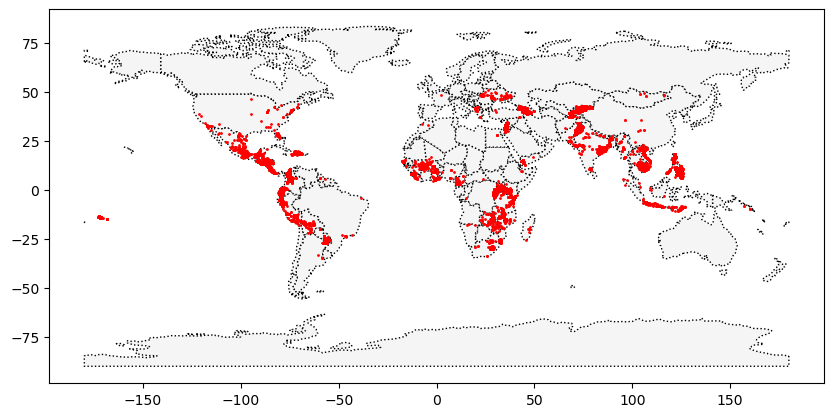

In [11]:
# Your code here

# Plot the data
ax = world.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=1, color='red')

# Uncomment to see a hint
#q_2.hint()

In [ ]:
# Get credit for your work after you have created a map
# q_2.check()

# Uncomment to see our solution (your code may look different!)
#q_2.solution()

### 3) 필리핀에 기반을 둔 대출에 중점을 둡니다.

다음으로, 필리핀에 기반을 둔 대출에 중점을 둡니다. 다음 코드 셀에서 `world_loans`에서 필리핀에 기반을 둔 대출이있는 모든 행을 포함하는 GeoDataFrame `PHL_loans`를 생성하세요.

In [13]:
# Your code here
PHL_loans = world_loans[world_loans['country'] == 'Philippines'].copy()

# Check your answer
# q_3.check()

In [ ]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

### 4) Understand loans in the Philippines.

다음 코드셀을 수정하지 마세요. 코드셀을 실행하면 필리핀의 모든 섬에 대한 경계가 포함 된 GeoDataFrame `PHL`이 로드됩니다.

In [14]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("archive/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


`PHL`과 `PHL_loans GeoDataFrames`을 사용하여 필리핀 내 대출을 시각화하세요.

<AxesSubplot:>

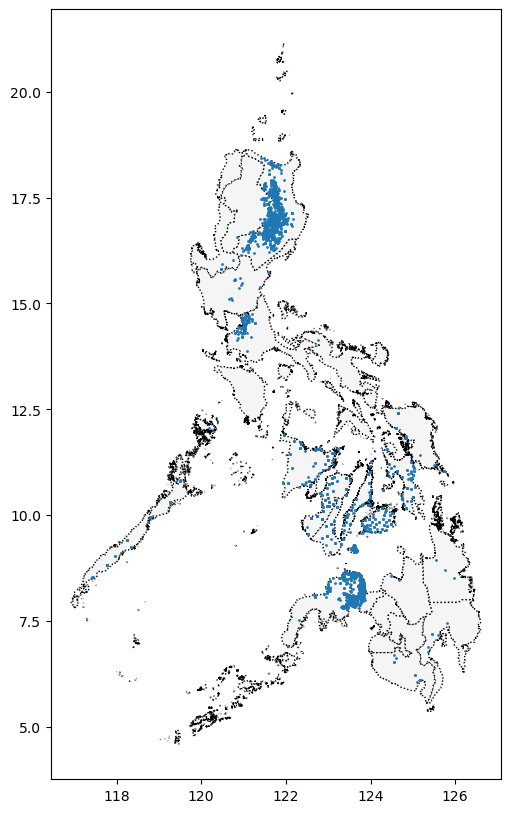

In [16]:
# Your code here
PHL_loans = world_loans[world_loans['country']=='Philippines']

ax = PHL.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(ax=ax, markersize=1)

# Uncomment to see a hint
#q_4.a.hint()

In [ ]:
# Get credit for your work after you have created a map
# q_4.a.check()

# Uncomment to see our solution (your code may look different!)
#q_4.a.solution()

새로운 현지 파트너를 모집하는 것이 유용한 섬을 식별할 수 있나요? 현재 키바의 영향권 밖으로 보이는 섬이 있나요? 

이 질문에 답하기 위해 이 링크 [this map](https://bit.ly/2U2G7x7)를 참고할 수 있습니다.

In [ ]:
# View the solution (Run this code cell to receive credit!)
# q_4.b.solution()

새로운 현지 파트너를 모집하는 것이 유용한 섬을 찾을 수 있습니다. 지도를 살펴보면 몇몇 작은 섬이 Kiva의 영향권 밖에 있는 것으로 보입니다. 이러한 지역에서 새로운 파트너를 모집하여 Kiva의 영향력을 확대할 수 있습니다. 또한, 필리핀 전역에서 대출이 거의 이루어지지 않는 지역이 있으며, 이 지역에서도 현지 파트너 모집이 필요할 수 있습니다.

# Keep going

Continue to learn about **[coordinate reference systems](https://www.kaggle.com/alexisbcook/coordinate-reference-systems)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*